In [60]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('mini.jpg')

In [61]:
# hsv 컬러 형태로 변형합니다.
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# h, s, v로 컬러 영상을 분리 합니다. 
h, s, v = cv2.split(hsv)
# v값을 히스토그램 평활화를 합니다.
equalizedV = cv2.equalizeHist(v)
equalizedS = cv2.equalizeHist(s)
equalizedH = cv2.equalizeHist(h)
# h,s,equalizedV를 합쳐서 새로운 hsv 이미지를 만듭니다.
hsv1 = cv2.merge([h,s,equalizedV])
hsv2 = cv2.merge([h,equalizedS,equalizedV])
hsv3 = cv2.merge([equalizedH,equalizedS,equalizedV])
# 마지막으로 hsv2를 다시 BGR 형태로 변경합니다.
hsvDst1 = cv2.cvtColor(hsv1, cv2.COLOR_HSV2BGR)
hsvDst2 = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
hsvDst3 = cv2.cvtColor(hsv3, cv2.COLOR_HSV2BGR)

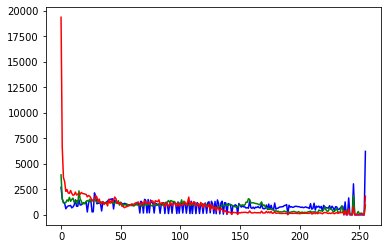

In [62]:
channels = cv2.split(hsvDst1)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

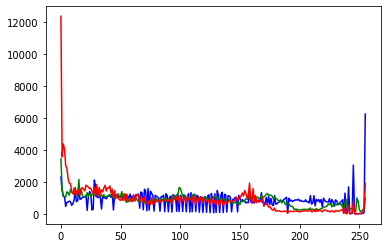

In [63]:
channels = cv2.split(hsvDst2)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

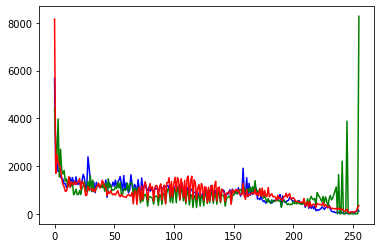

In [64]:
channels = cv2.split(hsvDst3)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

In [65]:
a=cv2.hconcat([img, hsvDst1])
b=cv2.hconcat([hsvDst2,hsvDst3])
final=cv2.vconcat([a,b])
cv2.imshow('final dst', final)
cv2.waitKey()
cv2.destroyAllWindows()